# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# TME 08X - Maximum de vraisemblance

<div class="alert alert-block alert-warning">
Dans ce TME, l'objectif est d'apprendre grâce à l'estimateur de maximum de vraisemblance les paramètres de lois normales à partir d'un ensemble d'images réelles de chiffres provenant de codes postaux écrits manuellement et scannés par le service des postes américain. Ces lois normales seront ensuite exploitées pour reconnaître automatique des chiffres.

Les images scannées ont été normalisées de manière à ce qu'elles soient toutes des images de 16x16 pixels en teintes de gris, et utilisées dans un travail de recherche en IA de Le Cun et al., 1990 :

Y. LeCun, O. Matan, B. Boser, J. S. Denker, et al. (1990) *Handwritten zip code recognition with multilayer networks*. In ICPR, volume II, pages 35–40.

Voici quelques exemples d'images de cette base : 
    
<img src="usps.png" title="Quelques exemples">
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1 - Prise en main des données

<div class="alert alert-block alert-warning">
Nous allons commencer par charger des données et regarder comment elles se présentent.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour charger les données.
</div>

In [3]:
import pickle as pkl
import gzip
image = pkl.load(gzip.open('image.pkl.gz','rb'))
chiffre = pkl.load(gzip.open('chiffre.pkl.gz','rb')) 

<div class="alert alert-block alert-info">
    Q1.1 - Quelles sont les longueurs des tableaux <code>image</code> et <code>chiffre</code>. La taille d'une matrice <code>image[i]</code> ?
</div>

In [4]:
len(image), len(chiffre), len(image[0])

(6229, 6229, 16)

<div class="alert alert-block alert-info">
    Q1.2 - Afficher les deux premières donnée du tableau <code>image</code> et les deux premières données du tableau <code>chiffre</code>.
</div>

In [5]:
chiffre[:2], image[:2]

(array([0, 9]),
 array([array([[0.        , 0.        , 0.        , 0.05151367, 0.62060547,
         0.90527344, 0.38452148, 0.38452148, 0.38452148, 0.1550293 ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.09448242, 0.68994141, 1.        ,
         1.        , 1.        , 1.        , 1.        , 0.87548828,
         0.76904297, 0.19152832, 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.63037109, 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 0.84912109, 0.41357422, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.26293945, 1.        , 1.        ,
         1.        , 1.        , 0.87548828, 0.69238281, 0.86376953,
         1.        , 1.        , 0.98632812, 0.21154785, 0.        ,
         0.        ],
        [0.        , 0.        , 0.38110352, 1.        , 1.  

<div class="alert alert-block alert-warning">
Les données se présentent sous la forme de deux tableaux. Le premier tableau <code>image</code> contient des images dont nous allons voir l'encodage un peu plus loin. Le second tableau <code>chiffre</code> contient des chiffres entre 0 et 9.
</div>

<div class="alert alert-block alert-info">
Q1.3 - Dessiner un histogramme des effectifs de chaque chiffre dans la colonne <code>'chiffre'</code>.
</div>

(array([1065.,  857.,  618.,  564.,  546.,  472.,  573.,  510.,  484.,
         540.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

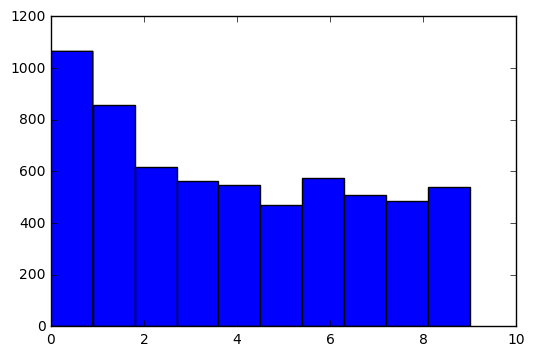

In [6]:
plt.hist(chiffre)

<div class="alert alert-block alert-warning">
    Une image du tableau <code>image</code> correspond à une matrice :
$$
\begin{bmatrix} 
    x_{0, 0} & \dots & x_{0, 15} \\
    \vdots & \ddots & \vdots \\
    x_{15, 0} & \dots & x_{15, 15} 
    \end{bmatrix}
$$

où les $x_{i,j}$ sont des nombres réels compris entre 0 et 1 qui représentent une teint de gris (0 = noir, 1 = blanc).
</div>

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour définir la fonction <code>affiche_une_image</code> qui permet d'afficher une image.
</div>

In [7]:
def affiche_une_image(image):
    _ = plt.imshow(image, cmap='gray', interpolation='none')
    _ = plt.colorbar()
    return None

<div class="alert alert-block alert-info">
Q1.4 - Afficher l'image d'indice 42 grâce à la fonction précédente.
</div>

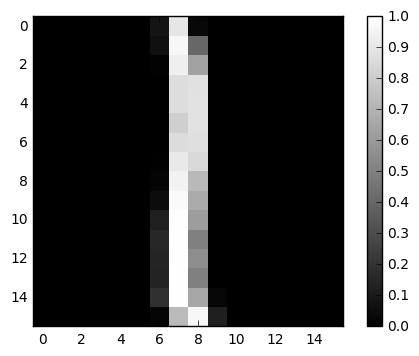

In [8]:
affiche_une_image(image[42])

<div class="alert alert-block alert-warning">
Vous devez voir un 1.
</div>

<div class="alert alert-block alert-info">
    Q1.5 - Afficher la valeur du tableau <code>chiffre</code> pour le même index.
</div>

In [9]:
chiffre[42]

1

<div class="alert alert-block alert-warning">
Vous devez obtenir la valeur 1.
</div>

<div class="alert alert-block alert-info">
Exécuter les deux blocs suivants pour afficher plusieurs images à partir d'une sous-partie du tableau de données.

Remarque : la fonction limite le nombre d'image affichées à 10 pour réduire le temps de calcul.
</div>

In [10]:
def affiche_des_images(tab_images):
    nb = min(len(tab_images), 10)
    fig = plt.figure(figsize=(16, 16))
    for i in range(nb):
        fig.add_subplot(1, nb, i+1)
        _ = plt.imshow(tab_images[i], cmap='gray', interpolation='none')
    plt.show()

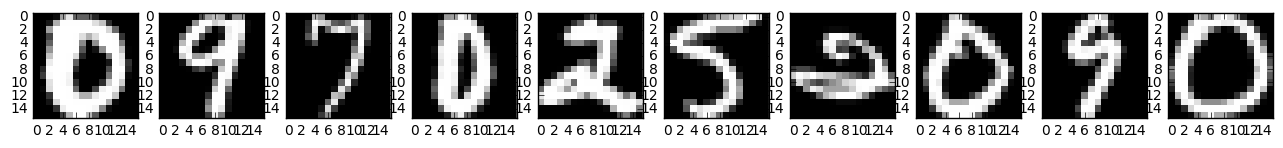

In [11]:
affiche_des_images(image)

# 2 - Génération d'images du chiffre 8

<div class="alert alert-block alert-info">
Q2.1 - Déclarer la variable <code>huit</code> qui contiendra toutes les lignes correspondant au chiffre 8.
</div>

In [12]:
huit = [image[i] for i in range(len(image)) if chiffre[i] == 8]

<div class="alert alert-block alert-info">
    Q2.2 - Afficher les images du tableau <code>huit</code> pour vérifier.
</div>

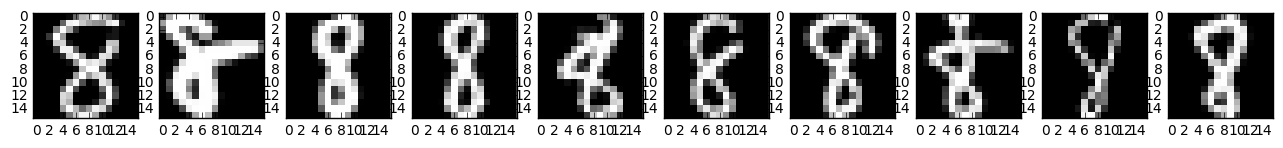

In [13]:
affiche_des_images(huit)

<div class="alert alert-block alert-warning">
On définit des variable aléatoire représentant les pixels composant une image de 8 :
$$
\begin{bmatrix} 
    X_{0, 0} & \dots & X_{0, 15} \\
    \vdots & \ddots & \vdots \\
    X_{15, 0} & \dots & X_{15, 15} 
    \end{bmatrix}
$$

On suppose de plus que la teinte de chaque pixel suit une loi normale.
$$\forall i\in\{0,\dots,15\}, \forall j\in\{0,\dots,15\}, X_{i,j} \sim {\mathcal N}(\mu^{(8)}_{i,j},(σ^{8}_{i,j})^2)$$ 
</div>

<div class="alert alert-block alert-warning">
L'estimateur de maximum de vraisemblance pour les paramètres d'une loi normale
    pour des $X_i \sim {\mathcal N}(\mu, \sigma^2)$ <em>iid</em> sont :

$$ \text{moyenne : } M_{ML} = \frac{1}{n} \sum_{i = 1}^{n} X_i$$
$$ \text{variance : } S_{ML}^2 = \frac{1}{n} \sum_{i = 1}^{n} (X_i - M_{ML})^{2} \text{ (légèrement biaisé).}$$
</div>

<div class="alert alert-block alert-info">
    Q2.3 - Pour les données <code>huit</code>, écrire une fonction <code>estimation</code> qui, pour chaque pixel, calcule une estimation de $\mu^{(8)}_{i,j}$ et $(\sigma^{8}_{i,j})^2$. On renverra le resultat sous la forme d'une matrice $16 \times 16$ (comme pour une image).
</div>

In [14]:
def estimation(data):
    mu = np.zeros((16,16))
    sigma2 = np.zeros((16,16))

    for image in data:
        for i in range(16):
            for j in range(16):
                mu[i][j] += image[i,j]
                
    mu/=len(data)
    
    for image in data:
        for i in range(16):
            for j in range(16):
                sigma2[i][j] += (image[i,j] - mu[i][j])**2
    
    sigma2/=len(data)
    
    return mu, sigma2

<div class="alert alert-block alert-info">
Q2.4 - Calculer dans deux variables <code>mu8</code> et <code>sig_carre8</code>, les matrices des $\mu^{(8)}_{i,j}$ et des $(σ^{8}_{i,j})^2$.
</div>

In [15]:
mu8, sig_carre8 = estimation(huit)
mu8, sig_carre8

(array([[1.03197019e-03, 1.11303467e-02, 4.45532976e-02, 1.07072212e-01,
         2.16572444e-01, 3.80982249e-01, 5.45732949e-01, 6.18830758e-01,
         5.89119641e-01, 4.62519123e-01, 3.01254020e-01, 1.67038662e-01,
         6.39503111e-02, 2.46640207e-02, 7.11226857e-03, 2.36876937e-03],
        [8.30995544e-03, 4.85627513e-02, 1.23204670e-01, 2.77051175e-01,
         5.00368819e-01, 7.17787325e-01, 7.96267446e-01, 7.86731724e-01,
         7.43516015e-01, 6.98298109e-01, 5.80010689e-01, 3.95526453e-01,
         1.94571664e-01, 7.63612345e-02, 2.77111905e-02, 5.95628723e-03],
        [2.02442240e-02, 7.54081612e-02, 1.79197059e-01, 4.12653665e-01,
         6.37584777e-01, 6.72008877e-01, 5.35718053e-01, 4.17216097e-01,
         3.83036085e-01, 4.69399727e-01, 5.76635758e-01, 5.15640993e-01,
         2.93055457e-01, 1.12547221e-01, 3.96042156e-02, 9.63090471e-03],
        [2.18270475e-02, 7.65382909e-02, 2.11167160e-01, 4.69686276e-01,
         6.37434419e-01, 5.19879704e-01, 2.87851

<div class="alert alert-block alert-info">
Q2.5 - Générer un huit en tirant chaque pixel suivant une loi normale $\mathcal{N}(\mu^{(8)}_{i,j}, (σ^{8}_{i,j})^2)$ et l'afficher.
</div>

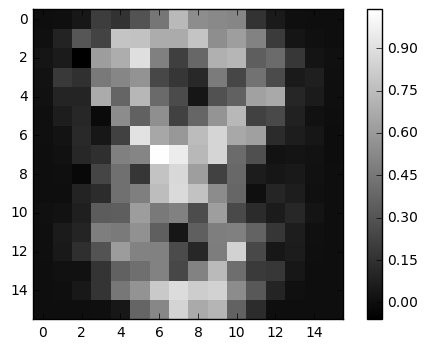

In [16]:
pixel = np.zeros((16,16))
for i in range(16):
    for j in range(16):
        pixel[i][j] = np.random.normal(mu8[i][j],sig_carre8[i][j])
affiche_une_image(pixel)

# 3 - On refait le travail pour tous les chiffres

<div class="alert alert-block alert-info">
    3.1 - Créer une liste <code>parametres_tous_chiffres</code> des estimations pour tous les chiffres de 0 à 9.
</div>

In [17]:
zeros = [image[i] for i in range(len(image)) if chiffre[i] == 0]
un = [image[i] for i in range(len(image)) if chiffre[i] == 1]
deux = [image[i] for i in range(len(image)) if chiffre[i] == 2]
trois = [image[i] for i in range(len(image)) if chiffre[i] == 3]
quatres = [image[i] for i in range(len(image)) if chiffre[i] == 4]
cinq = [image[i] for i in range(len(image)) if chiffre[i] == 5]
six = [image[i] for i in range(len(image)) if chiffre[i] == 6]
sept = [image[i] for i in range(len(image)) if chiffre[i] == 7]
neufs = [image[i] for i in range(len(image)) if chiffre[i] == 9]

chiffres = [zeros, un, deux, trois, quatres, cinq, six, sept, huit, neufs]
parametres_tous_chiffres = [estimation(i) for i in chiffres]

<div class="alert alert-block alert-warning">
La loi normale (de paramètre $\mu$ et $\sigma^2$) est la loi de la
    variable aléatoire $X$ réelle ($\mathcal{X} = \mathbb{R}$) telle que
    $$
    f(x) = \frac1{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x - \mu)^2}{2
    \sigma^2}\right).
    $$
    
Nous allons faire l'hypothèse (certes un peu forte mais tellement pratique) que, dans chaque classe, les teintes des pixels d'une image sont indépendantes. On peut donc définir la loi jointe pour une image comme le produit des lois marginales.
    
$$f_{X_{0,0}, \dots, X_{0, 15}, \dots X_{15, 0}, \dots, X_{15, 15}}(x_{0,0}, \dots, x_{0, 15}, \dots x_{15, 0}, \dots, x_{15, 15}) = \prod_{i=0}^{15} \prod_{j=0}^{15} f_{X_{i, j}}(x_{i,j})$$

En passant au logarithme, on obtient la log-densité :
$$\log \left( f_{X_{0,0}, \dots, X_{0, 15}, \dots X_{15, 0}, \dots, X_{15, 15}}(x_{0,0}, \dots, x_{0, 15}, \dots x_{15, 0}, \dots, x_{15, 15}) \right) = -\frac{1}{2} \sum_{i=0}^{15} \sum_{j=0}^{15} \left[ \log(2\pi \sigma^2_{i,j}) + \frac{(x_{i, j}-\mu_{i, j})^2}{\sigma_{i,j}^2} \right]$$
    
</div>

<div class="alert alert-block alert-info">
    3.2 - Écrire une fonction <code>log_densite</code> qui étant donné une <code>image</code> et les <code>parametres</code> d'un chiffre, calcule valeur de la fonction de densité pour une image donnée et un modèle de chiffre donné.
    
Dans la fonction, certaines valeurs de la matrice de variance valent 0 (ce qui pose des problèmes). Pour palier cela, ajouter la ligne suivant pour remplacer les zéros par des $10^{-3}$ :

<code>sig2 = np.maximum(sig2, 1e-3)</code>
</div>

In [18]:
def log_densite(image, parametres):
    mu, sig2 = parametres
    sig2 = np.maximum(sig2, 1e-3)
    res = np.zeros((16,16))
    for i in range(16):
        for j in range(16):
            res[i][j] = np.sum(np.log(2*np.pi*sig2[i][j]) + (image[i][j] - mu[i][j])**2 / sig2[i][j])
    
    return -np.sum(res)/2

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour tester la fonction.
</div>

In [19]:
log_densite(image[0], (mu8, sig_carre8))

-143.29946650088695

<div class="alert alert-block alert-warning">
    Vous devez trouver <code>-143.29946650088695</code>
</div>

## 4 - Le modèle le plus vraisemblable
<div class="alert alert-block alert-info">
4.1 - Écrire une fonction <code>plus_vraisemblable</code> qui, étant donné une image et l'ensemble de paramètres déterminés dans les questions précédentes, renvoie le chiffre pour lequel la vraisemblance est la plus grande.
    
Comme on calcule la vraisemblance d'une seule image (pour un chiffre donné), la vraisemblance est égale à la valeur de la densité (produit portant sur une seule valeur).
</div>

In [20]:
def plus_vraisemblable(image, parametres):
    
    maxi = log_densite(image, parametres[0])
    i_max = 0
    
    for i in range(1, len(parametres)):
        (mu, sigma2) = parametres[i]
        if log_densite(image, (mu, sigma2)) > maxi:
            
            maxi = log_densite(image, (mu, sigma2))
            i_max = i
         
    
    return i_max

<div class="alert alert-block alert-info">
Tester votre fonction pour voir si la vraisemblance maximale correspond à un 6
</div>

6

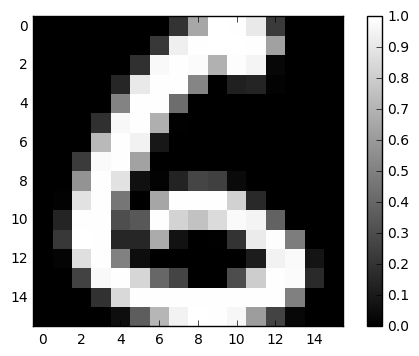

In [21]:
affiche_une_image(image[100])
plus_vraisemblable(image[100], parametres_tous_chiffres)

<div class="alert alert-block alert-info">
Q4.2 - Écrire une fonction  <code>prediction</code> qui, étant donné un tableau de données images et l'ensemble de paramètres déterminés dans les questions précédentes, revoie la liste de chiffres prédits par maximum de vraisemblance.
</div>

In [22]:
def prediction(image, parametres):
    res = []
    for i in image:
        res.append(plus_vraisemblable(i, parametres))
    return res

<div class="alert alert-block alert-info">
Q4.3 - Calculer dans une variable <code>chiffre_predit</code> le vecteur des prédictions pour chaque image.
</div>

In [25]:
chiffre_predit = prediction(image, parametres_tous_chiffres)

<div class="alert alert-block alert-info">
    4.4 - Écrire une fonction <code>matrice_confusion</code> qui, étant donné le vecteur de prédictions et le vecteur de vrais chiffres, calcule la matrice de confusion $10 \times 10$ définie ainsi :
$$
\begin{bmatrix} 
    n_{0, 0} & \dots & n_{0, 15} \\
    \vdots & \ddots & \vdots \\
    n_{15, 0} & \dots & n_{15, 15} 
    \end{bmatrix}
$$
où $n_{i, j}$ est le nombre d'occurences où on a fait la prédiction du chiffre $i$ alors que le vrai chiffre est $j$.
</div>

In [36]:
chiffre_predit[:3], chiffre[:3]

([0, 9, 7], array([0, 9, 7]))

In [44]:
def matrice_confusion(v_pred, v):
    res = np.zeros((10,10))

    for i, ch in enumerate(v):
        res[v_pred[i], ch] += 1
    return res

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour afficher la matrice de confusion sous la forme d'une image. Interpréter.
</div>

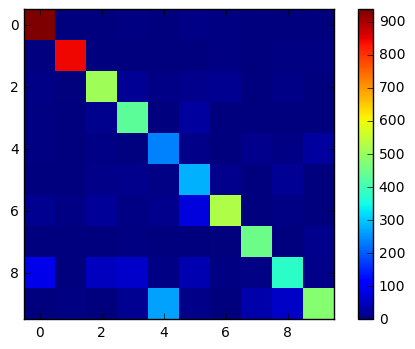

In [45]:
_ = plt.imshow(matrice_confusion(chiffre_predit, chiffre), interpolation='none')
_ = plt.colorbar()